In [ ]:
#@title Installations
import os
def rename_directory(old_name, new_name):
  os.rename(old_name, new_name)

#!git clone https://github.com/basetatube/Baseta_Tube_AI_Image_Enhance.git
!git clone https://github.com/sczhou/CodeFormer.git
rename_directory('CodeFormer', 'Baseta_Tube_AI_Image_Enhance')
%cd /content/Baseta_Tube_AI_Image_Enhance

# Set up the environment
# Install python dependencies
!pip install -r requirements.txt
!pip install ffmpeg-python
# Install basicsr
!python basicsr/setup.py develop

# Download the pre-trained model
!python scripts/download_pretrained_models.py facelib
!python scripts/download_pretrained_models.py CodeFormer

# Visualization function
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Baseta Tube - Before', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Baseta Tube - After', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

Cloning into 'CodeFormer'...
remote: Enumerating objects: 614, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 614 (delta 203), reused 176 (delta 176), pack-reused 321 (from 2)
Receiving objects: 100% (614/614), 17.31 MiB | 18.37 MiB/s, done.
Resolving deltas: 100% (297/297), done.
/content/Baseta_Tube_AI_Image_Enhance
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.9 MB/s eta 0:00:00
/usr/local/lib/python3.12/dist-packages/setuptools/__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ****************************************************

In [ ]:
#@title Image upload

import os
from google.colab import files
import shutil

upload_folder = 'inputs/user_upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving micheal_jackson.jpg to micheal_jackson.jpg
move micheal_jackson.jpg to inputs/user_upload/micheal_jackson.jpg


In [ ]:
#@title Settings adjustments
# Inference the uploaded images
#@markdown `CODEFORMER_FIDELITY`: تحقيق التوازن بين الجودة (الرقم الأقل) والدقة (الرقم الأعلى) <br/>Balance the quality (lower number) and fidelity (higher number)<br>
# you can add '--bg_upsampler realesrgan' to enhance the background
CODEFORMER_FIDELITY = 0.7 #@param {type:"slider", min:0, max:1, step:0.01}
#@markdown `BACKGROUND_ENHANCE`: تحسين جودة الخلفية فى الصورة<br/> Enhance background image with Real-ESRGAN<br>
BACKGROUND_ENHANCE = True #@param {type:"boolean"}
#@markdown `FACE_UPSAMPLE`: اعادة تكوين و تحسين الدقة للوجة <br/> Upsample restored faces for high-resolution AI-created images<br>
FACE_UPSAMPLE = True #@param {type:"boolean"}
if BACKGROUND_ENHANCE:
  if FACE_UPSAMPLE:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan --face_upsample
  else:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan
else:
  !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload

Downloading: "https://github.com/sczhou/CodeFormer/releases/download/v0.1.0/RealESRGAN_x2plus.pth" to /content/Baseta_Tube_AI_Image_Enhance/weights/realesrgan/RealESRGAN_x2plus.pth

100% 64.0M/64.0M [00:00<00:00, 241MB/s]
Face detection model: retinaface_resnet50
Background upsampling: True, Face upsampling: True
[1/1] Processing: micheal_jackson.jpg
	detect 1 faces

All results are saved in results/user_upload_0.7


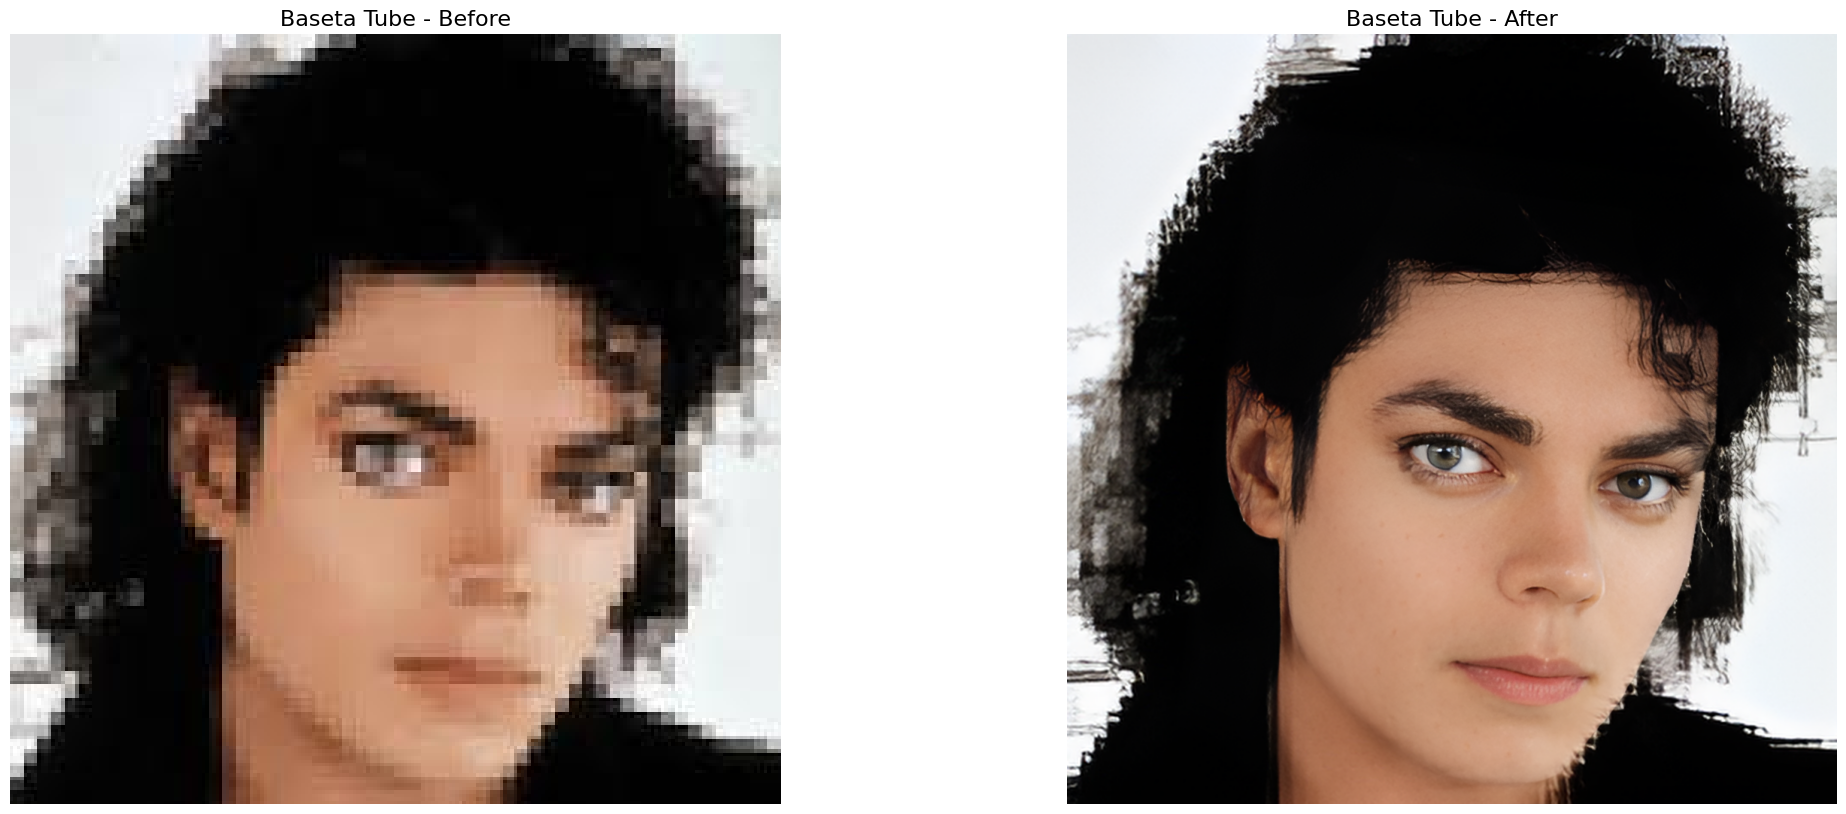

In [ ]:
#@title Before and after
import os
import glob

input_folder = 'inputs/user_upload'
result_folder = f'results/user_upload_{CODEFORMER_FIDELITY}/final_results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  basename = os.path.splitext(os.path.basename(input_path))[0]
  output_path = os.path.join(result_folder, basename+'.png')
  img_output = imread(output_path)
  display(img_input, img_output)

In [ ]:
#@title exporting results
!ls results
print('Download results')
os.system(f'zip -r results.zip results/user_upload_{CODEFORMER_FIDELITY}/final_results')
files.download("results.zip")

user_upload_0.7
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>